In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

In [17]:
print('Num GPUs available: ', tf.config.experimental.list_physical_devices('GPU'))

Num GPUs available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [18]:
df = pd.read_csv('datasets/games.csv')
# print(df.head())

In [28]:
# Define the function to encode chess moves into a fixed-length numerical vector
def encode_moves(moves):
    move_list = moves.split()
    encoded_moves = np.zeros(500)  # Assuming no game exceeds 250 moves (each move has two components)
    for i, move in enumerate(move_list):
        encoded_moves[i] = hash(move) % 50001  # Modulo operation to limit range, using a prime number for a better hash distribution
    return encoded_moves

# Load and prepare the data
df = pd.read_csv('datasets/games.csv')

# One-hot encode the target variable
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(df[['winner']])

# Encode the moves as defined in the encode_moves function
X_encoded = np.stack(df['moves'].apply(encode_moves).values)

train_X, temp_X, train_y, temp_y = train_test_split(X_encoded, y_encoded, test_size=0.4, random_state=42)
validation_X, test_X, validation_y, test_y = train_test_split(temp_X, temp_y, test_size=0.5, random_state=42)  # Split the remaining 40% equally into validation and test sets

In [29]:
# Define the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(500,)),  # Assuming each game is encoded in a 500-length vector
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # Output layer for three classes (white wins, black wins, draw)
])

/Users/ahmadashraf/Documents/code/Chess_AI/ml-env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model with categorical crossentropy
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with explicit validation data
history = model.fit(train_X, train_y, epochs=10, validation_data=(validation_X, validation_y))

# Evaluate the model on the test dataset
loss, accuracy = model.evaluate(test_X, test_y)
print(f"Test Accuracy: {accuracy*100:.2f}%")

NameError: name 'history' is not defined

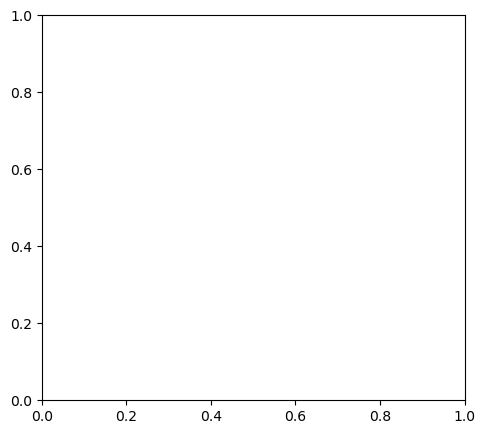

In [24]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()